In [12]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Chemin vers le fichier GZIP
gzip_file_path = "C:/Users/HanSAriEle/OneDrives/Desktop/PROJET_TUTORE/database_quality_ofair.csv.gz"

# Lire le fichier CSV directement depuis le fichier GZIP
data = pd.read_csv(gzip_file_path, compression='gzip')

# Afficher les premières lignes du DataFrame pour vérifier
data.head()

,Date,City,Country_Name,Continent,aqi,co,neph,no2,o3,pm10,pm25,so2,Categorie
0,2019-01-01,Addis Ababa,Ethiopia,Africa,38.0,1.933333,23.333333,7.333333,16.533333,15.333333,38.000000,1.266667,Bon
1,2019-01-01,Adelaide,Australia,Oceania,7.0,0.100000,3.666667,0.100000,0.000000,7.000000,6.000000,0.100000,Bon
2,2019-01-01,Barcelona,Spain,Europe,27.0,0.100000,9.666667,17.000000,4.900000,27.000000,27.666667,4.600000,Bon
3,2019-01-01,Bilbao,Spain,Europe,68.0,0.100000,39.000000,12.800000,3.300000,23.000000,68.000000,4.000000,Modéré
4,2019-01-01,Bogotá,Colombia,South America,34.0,4.600000,8.666667,2.300000,8.300000,17.000000,34.000000,0.300000,Bon


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101227 entries, 0 to 101226
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          101227 non-null  object 
 1   City          101227 non-null  object 
 2   Country_Name  101227 non-null  object 
 3   Continent     101227 non-null  object 
 4   aqi           101227 non-null  float64
 5   co            101227 non-null  float64
 6   neph          101227 non-null  float64
 7   no2           101227 non-null  float64
 8   o3            101227 non-null  float64
 9   pm10          101227 non-null  float64
 10  pm25          101227 non-null  float64
 11  so2           101227 non-null  float64
 12  Categorie     101227 non-null  object 
dtypes: float64(8), object(5)
memory usage: 10.0+ MB


In [4]:
data.columns

Index(['Date', 'City', 'Country_Name', 'Continent', 'aqi', 'co', 'neph', 'no2',
       'o3', 'pm10', 'pm25', 'so2', 'Categorie'],
      dtype='object')

In [6]:
# Valeurs manquantes
data.isnull().sum()

Date            0
City            0
Country_Name    0
Continent       0
aqi             0
co              0
neph            0
no2             0
o3              0
pm10            0
pm25            0
so2             0
Categorie       0
dtype: int64

**ANALYSE SUR LA BASE GLOBALE**

In [7]:
# Résumé statistique dse variables
data.describe()

,aqi,co,neph,no2,o3,pm10,pm25,so2
count,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000
mean,37.389683,2.427366,15.697583,6.432336,16.615007,19.398040,35.495872,2.088418
std,25.943097,4.440273,13.599923,5.165017,10.197773,15.082294,26.600233,2.588326
min,0.100000,0.100000,0.000000,0.100000,0.000000,1.000000,1.000000,0.100000
25%,21.200000,0.100000,6.000000,2.966667,8.266667,10.000000,18.000000,1.100000
50%,30.900000,1.300000,10.666667,5.100000,15.566667,16.000000,29.000000,1.600000
75%,48.000000,3.000000,22.333333,8.300000,24.300000,24.000000,47.000000,2.500000
max,999.000000,500.000000,255.000000,173.000000,500.000000,741.000000,999.000000,148.800000


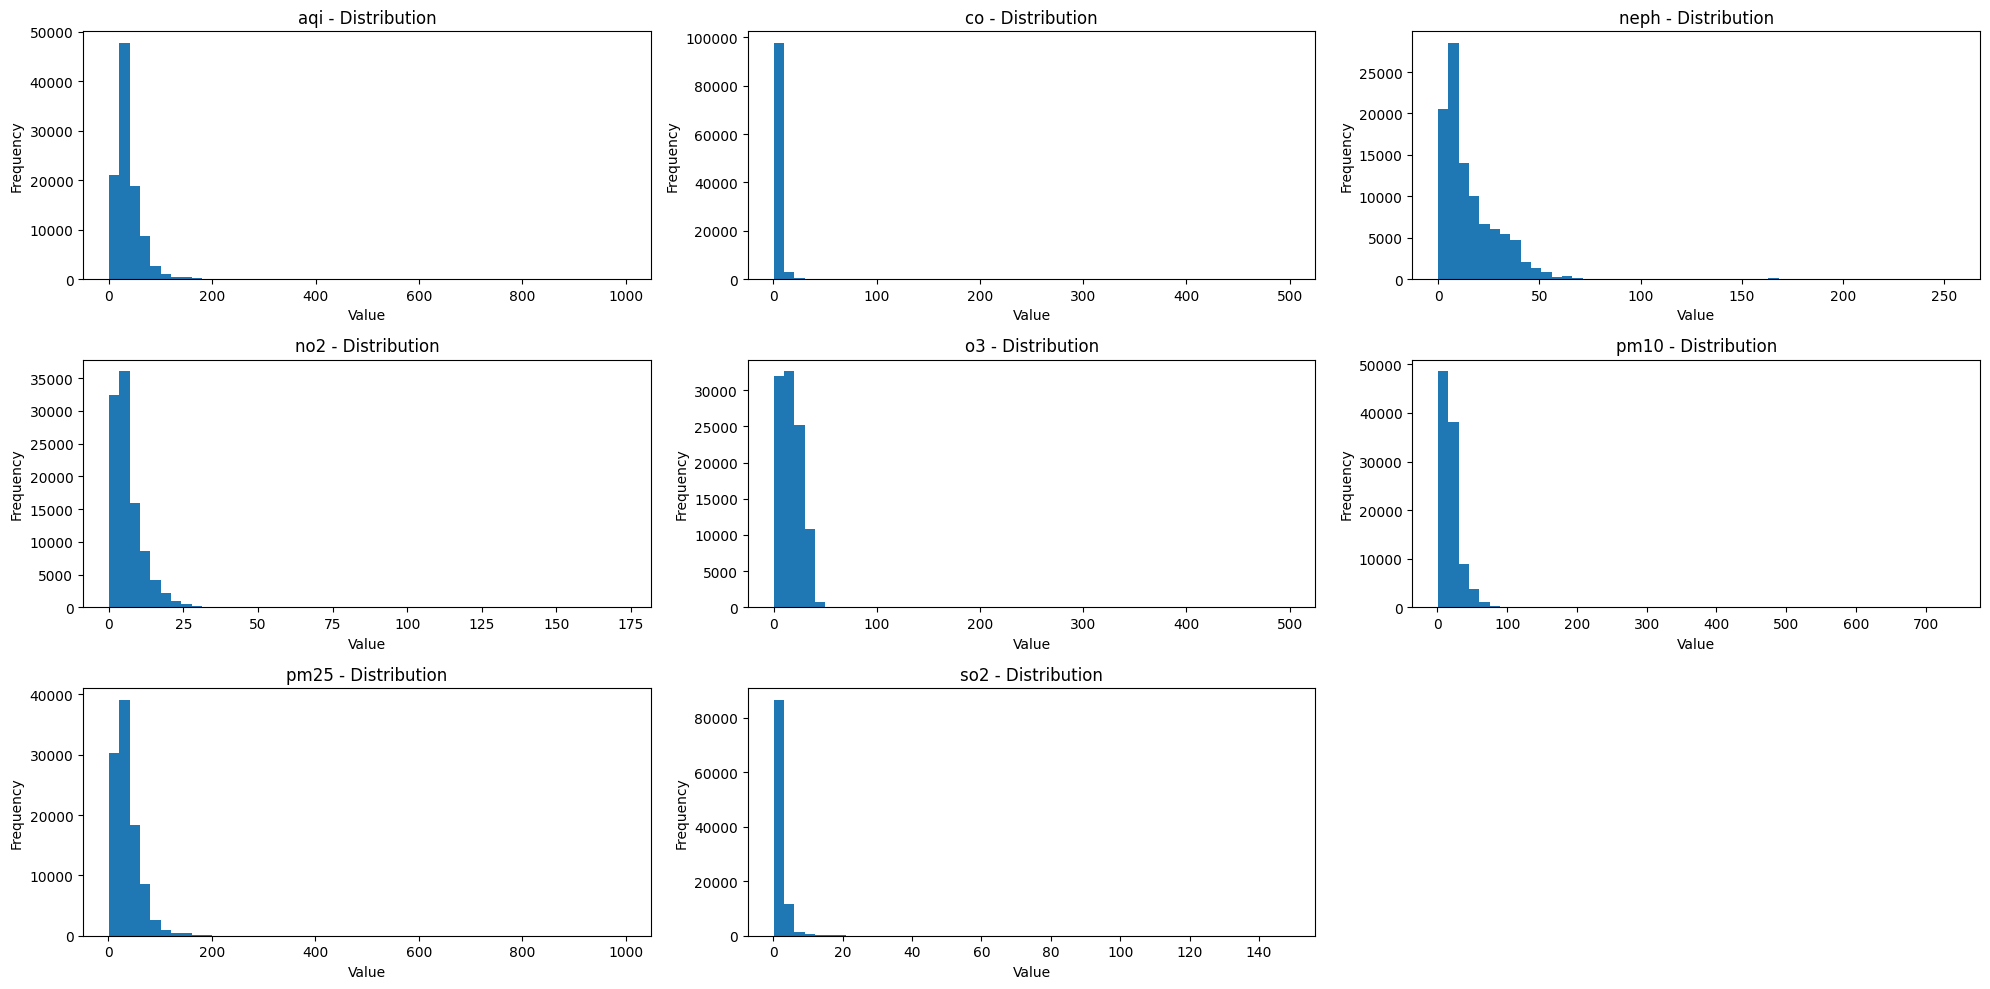

In [10]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])

# Tracé des histogrammes pour chaque colonne numérique
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
axs = axs.ravel()  # Aplatir la matrice de subplots en une liste

for i, column in enumerate(numeric_data.columns):
    axs[i].hist(numeric_data[column], bins=50)
    axs[i].set_title(f'{column} - Distribution')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Si il y a moins de subplots que d'axes, cacher les axes restants
for j in range(len(numeric_data.columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

**Distribution des variables**

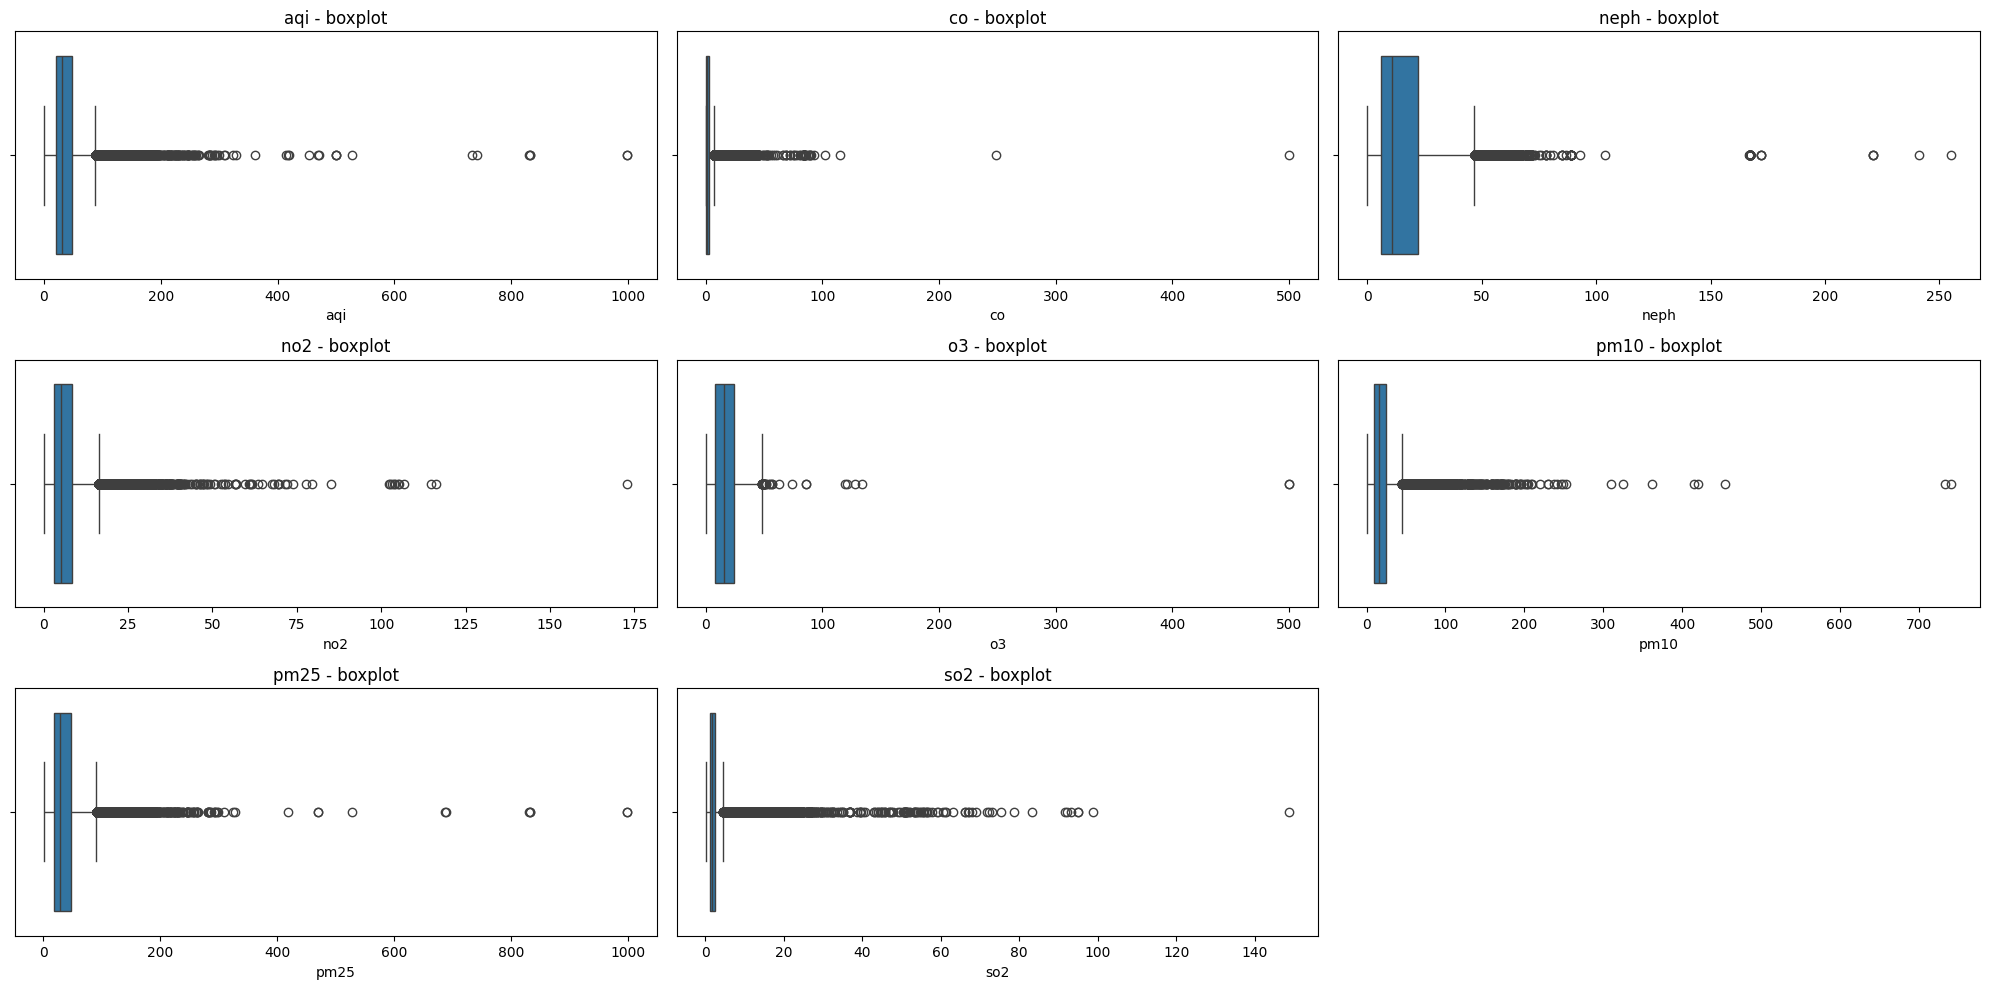

In [13]:
# Tracé des boxplots pour chaque colonne numérique
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
axs = axs.ravel()  # Aplatir la matrice de subplots en une liste

for i, column in enumerate(numeric_data.columns):
    sns.boxplot(x=numeric_data[column], ax=axs[i], orient='h')
    axs[i].set_title(f'{column} - boxplot')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('')

# Si il y a moins de subplots que d'axes, cacher les axes restants
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

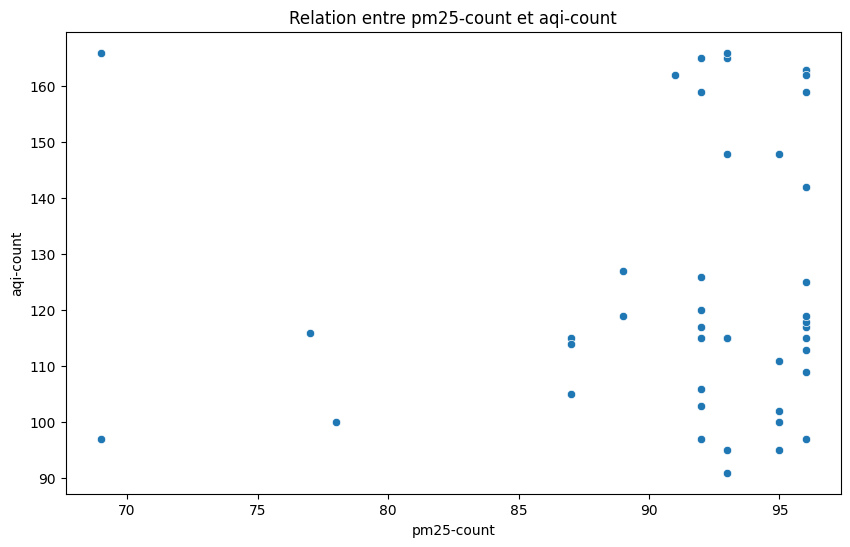

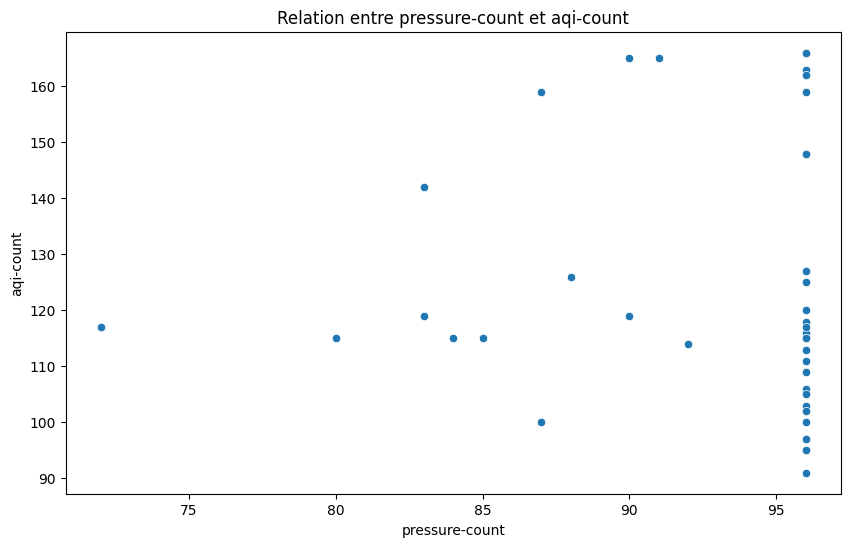

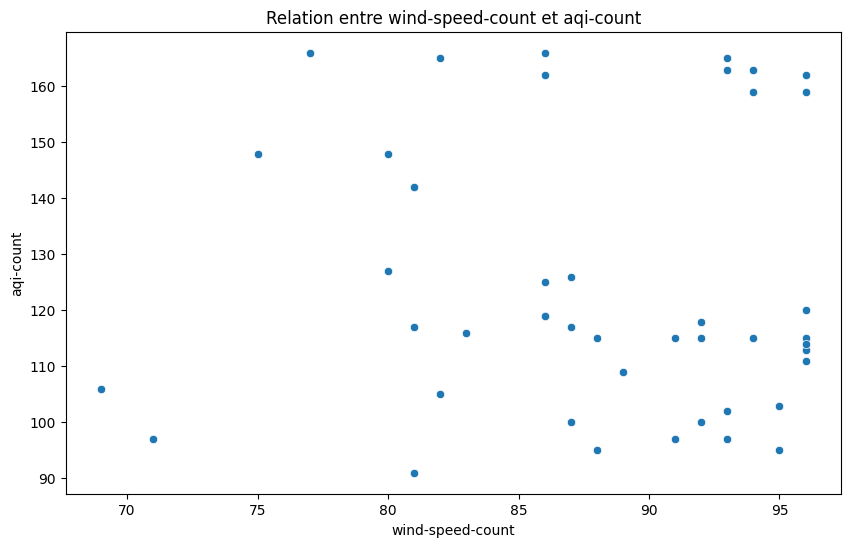

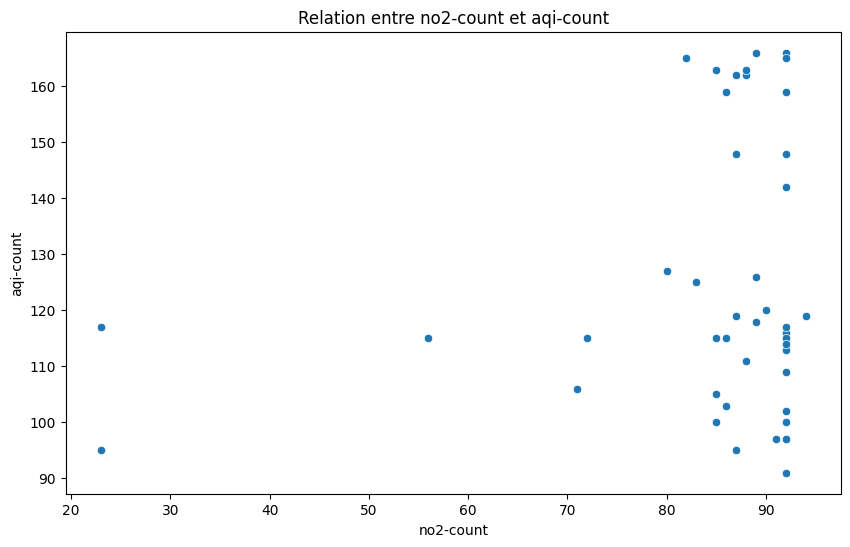

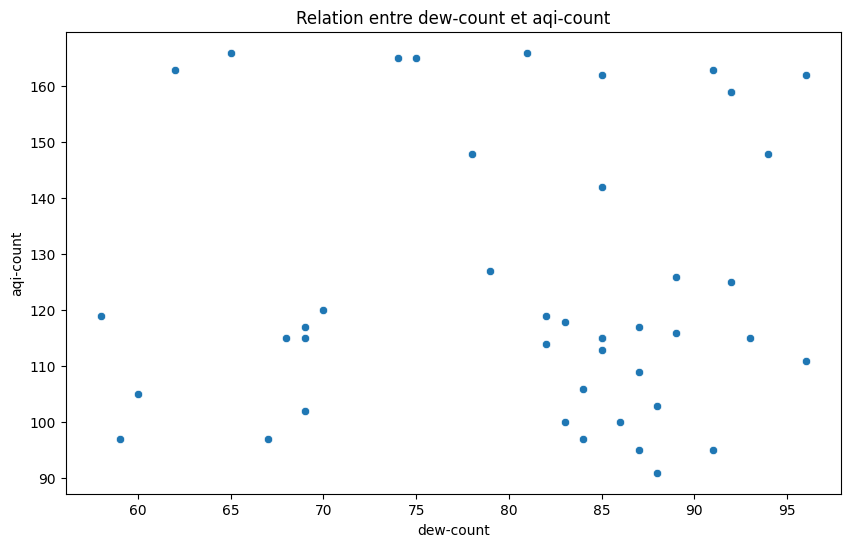

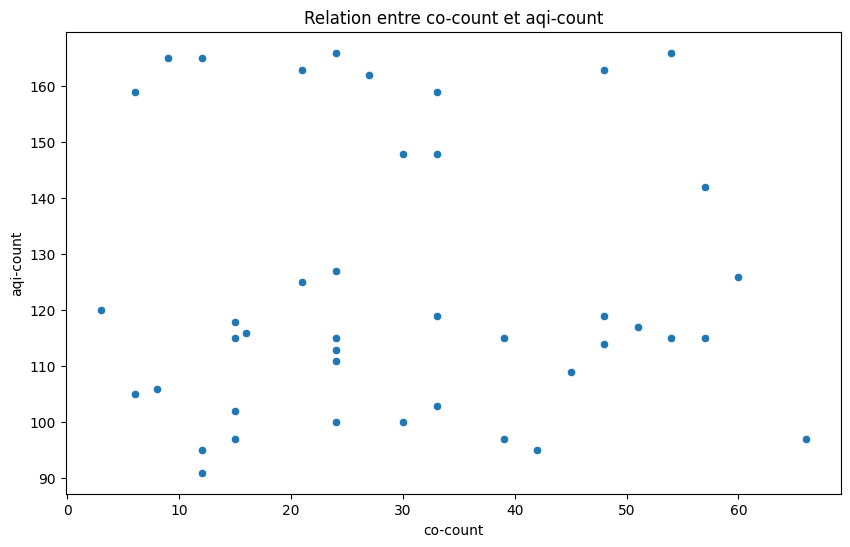

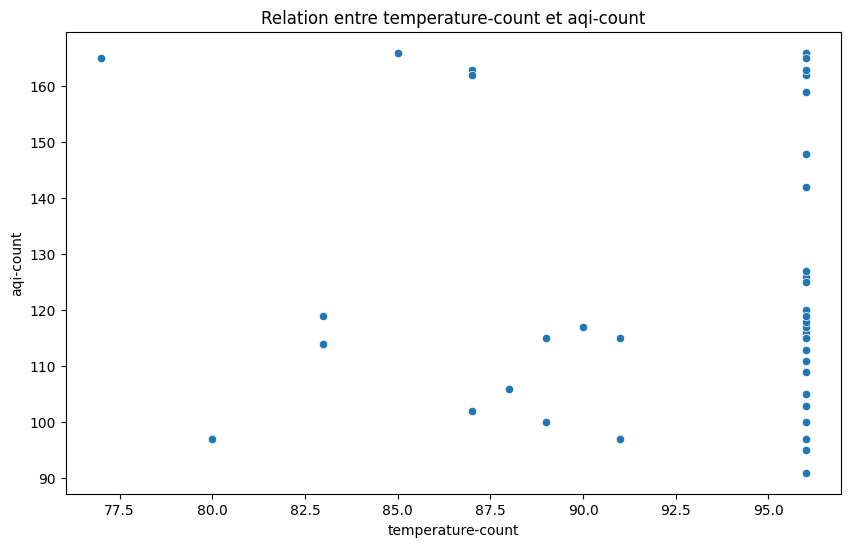

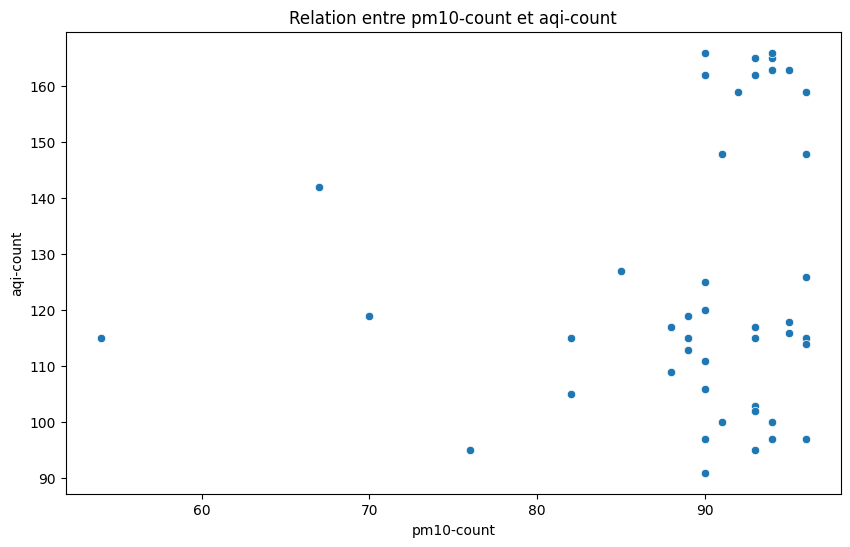

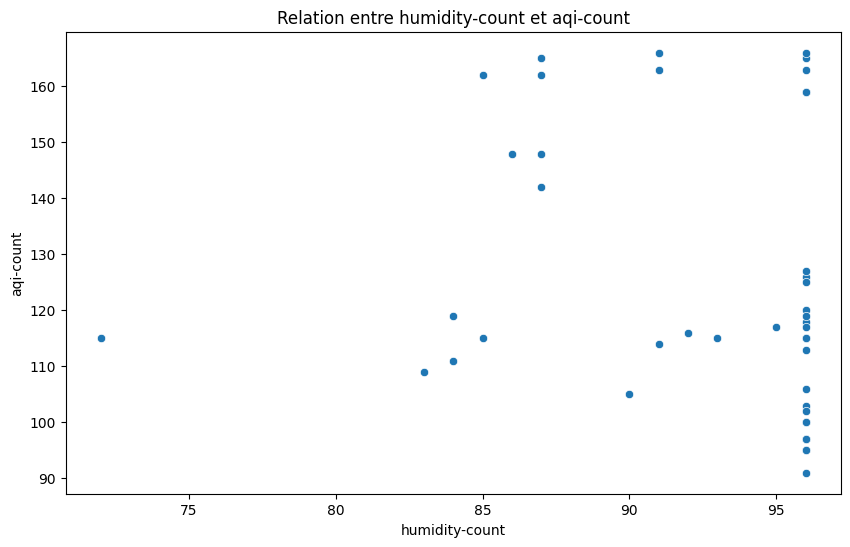

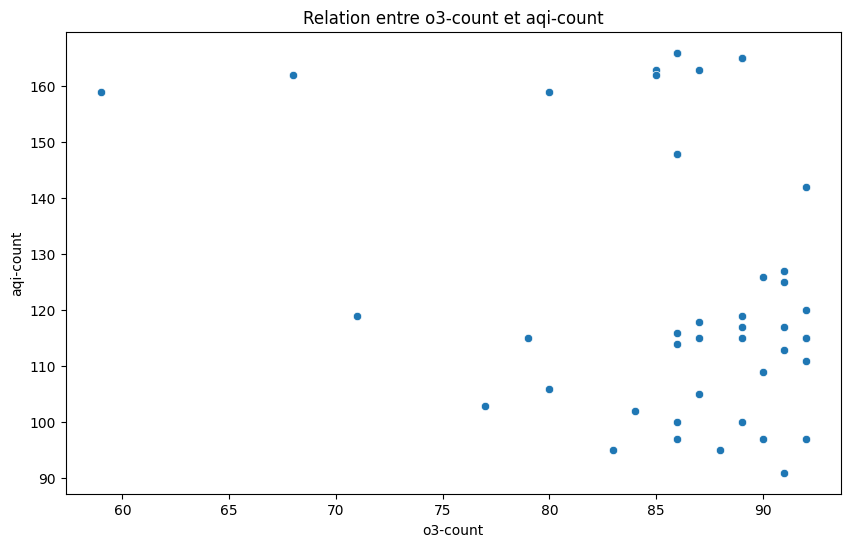

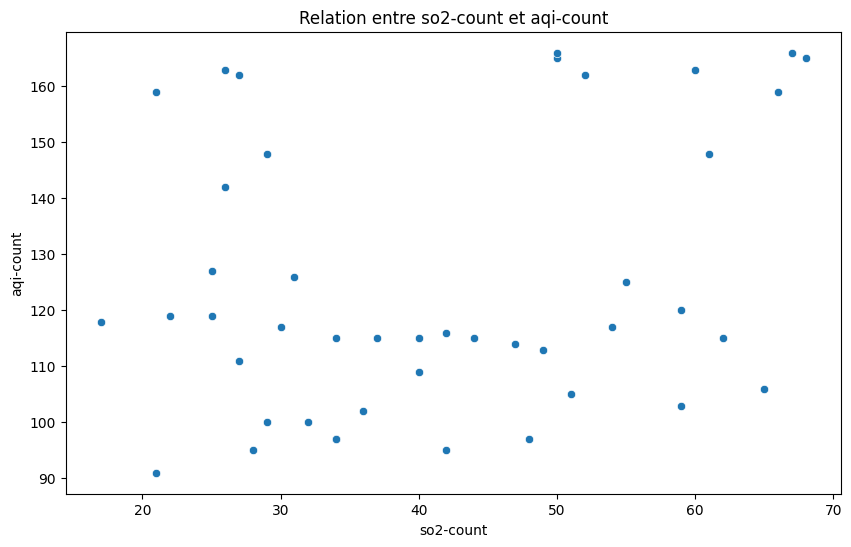

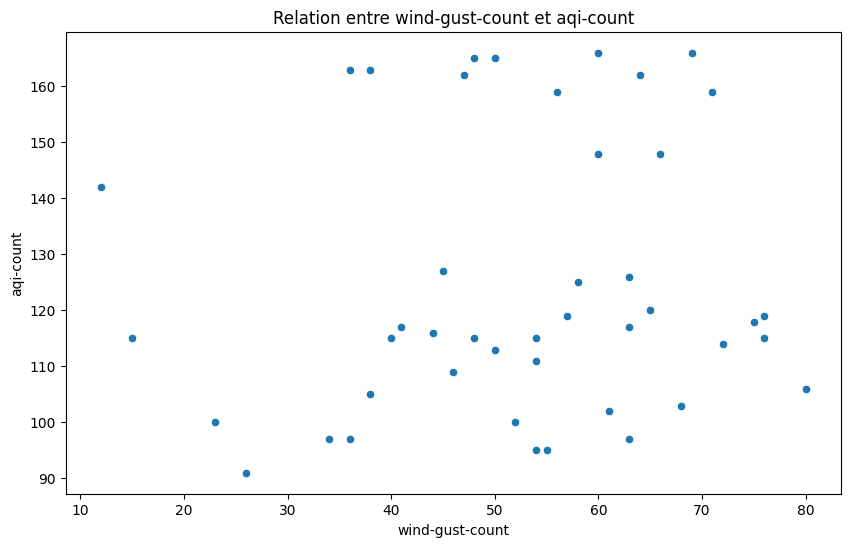

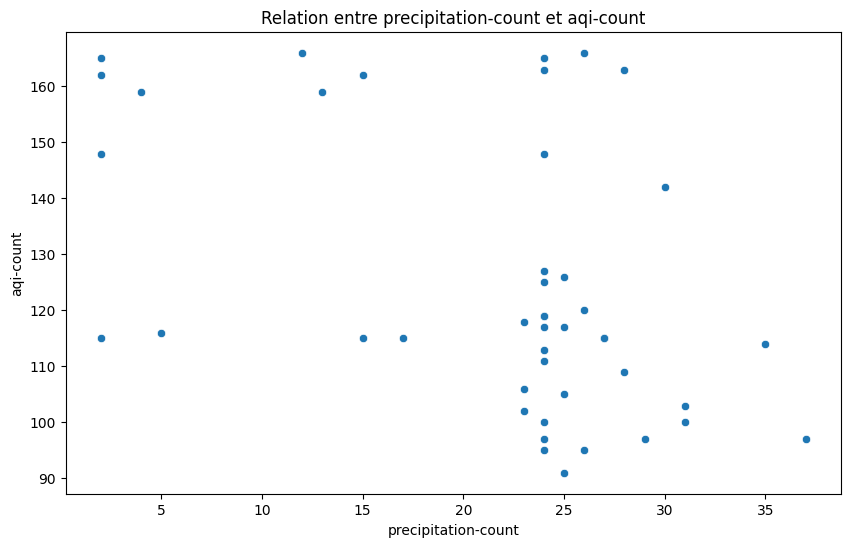

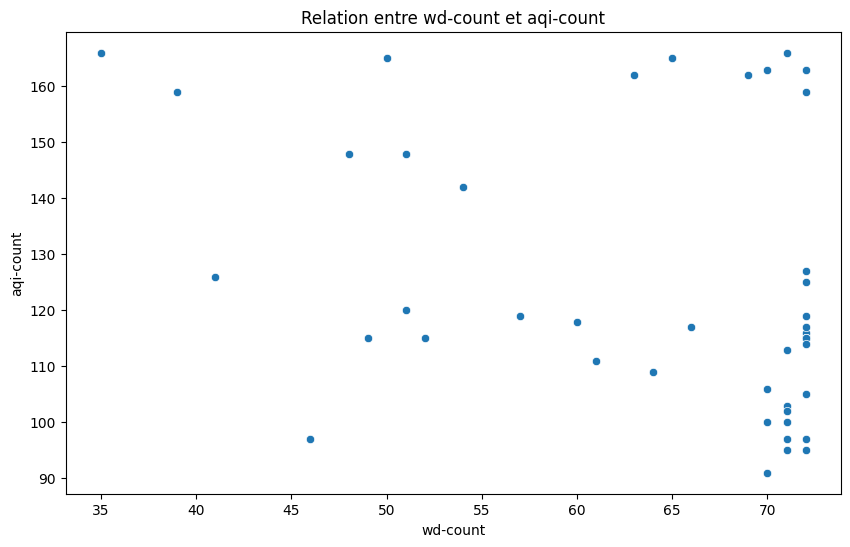

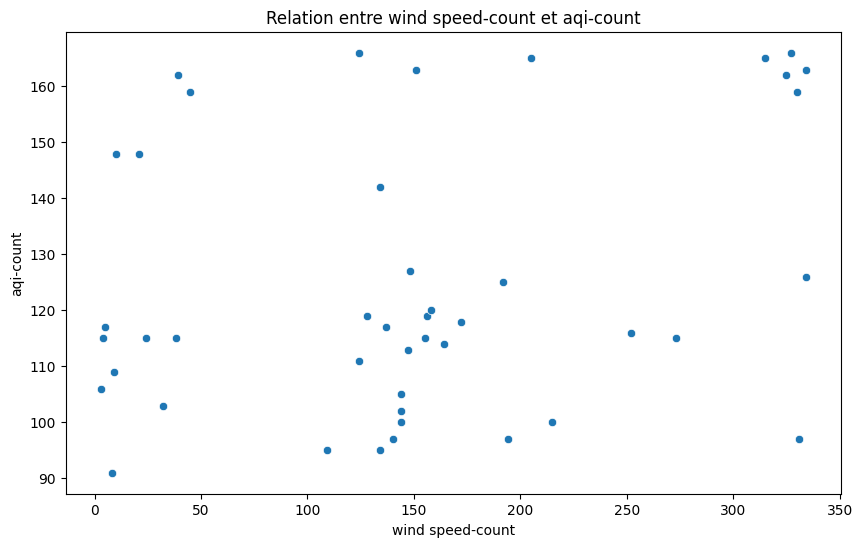

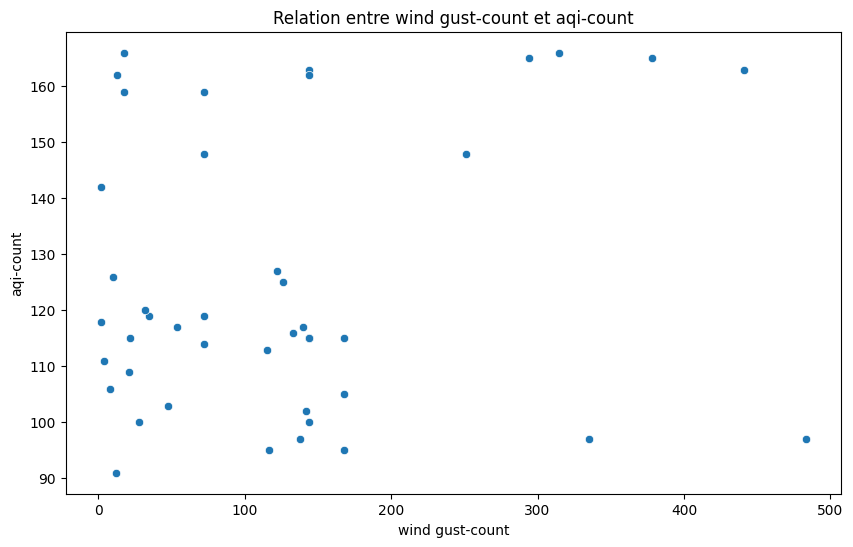

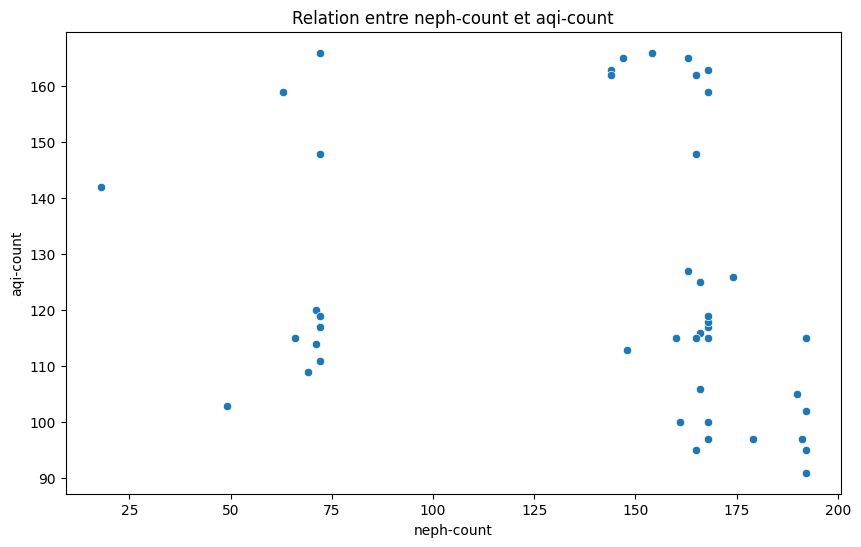

In [34]:
# Filtrer les données pour obtenir les lignes où Specie est 'aqi'
aqi_data = data[data['Specie'] == 'aqi']

# Vérifier si les données cibles existent
if not aqi_data.empty:
    # Parcourir toutes les variables de 'Specie' excepté 'aqi'
    for specie in data['Specie'].unique():
        if specie != 'aqi':
            specie_data = data[data['Specie'] == specie]
            
            # Assurer que les deux séries ont la même longueur
            min_length = min(len(specie_data), len(aqi_data))
            specie_counts = specie_data['count'].values[:min_length]
            aqi_counts = aqi_data['count'].values[:min_length]
            
            # Tracer le nuage de points
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=specie_counts, y=aqi_counts)
            plt.title(f'Relation entre {specie}-count et aqi-count')
            plt.xlabel(f'{specie}-count')
            plt.ylabel('aqi-count')
            plt.show()
else:
    print(f"No data found for Specie 'aqi'")

In [15]:
data.columns

Index(['Date', 'City', 'Country_Name', 'Continent', 'aqi', 'co', 'neph', 'no2',
       'o3', 'pm10', 'pm25', 'so2', 'Categorie'],
      dtype='object')

**Matrice de corrélation**

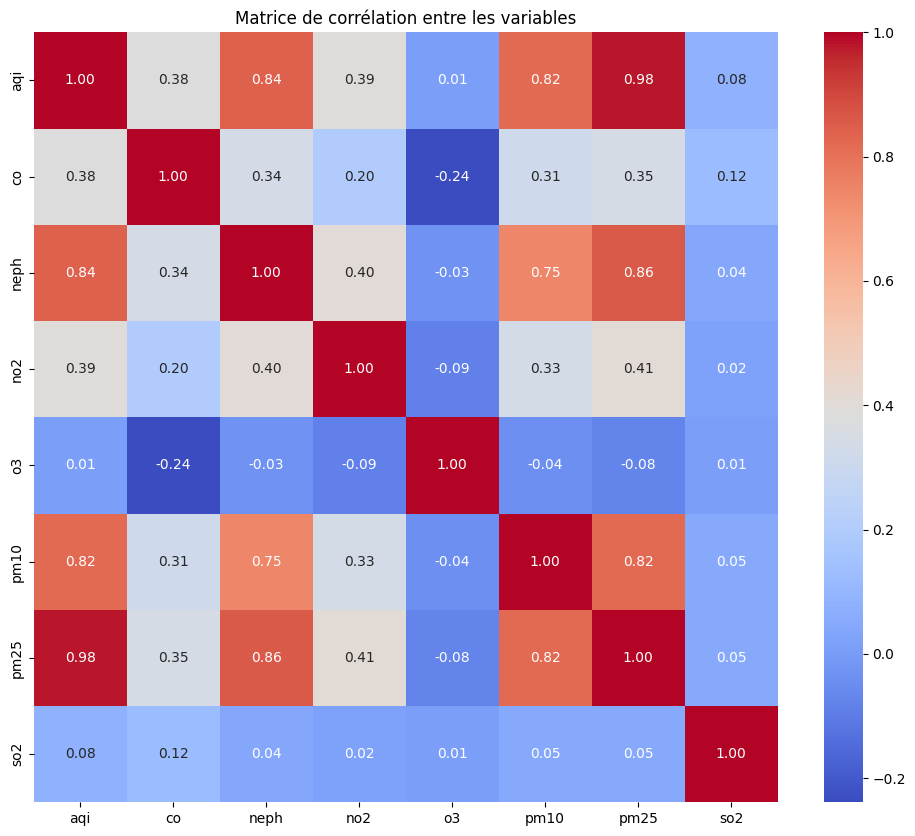

In [20]:
# Sélectionner les colonnes numériques pour le calcul de la corrélation
numeric_columns = ['aqi', 'co', 'neph', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Calculer la matrice de corrélation
corr_matrix = data[numeric_columns].corr()

# Afficher la matrice de corrélation sous forme de heatmap avec seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matrice de corrélation entre les variables')
plt.show()